In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [18]:
df = pd.read_csv('salary.csv')
df

,Position,scale,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [19]:
df.drop('Position', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   scale   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


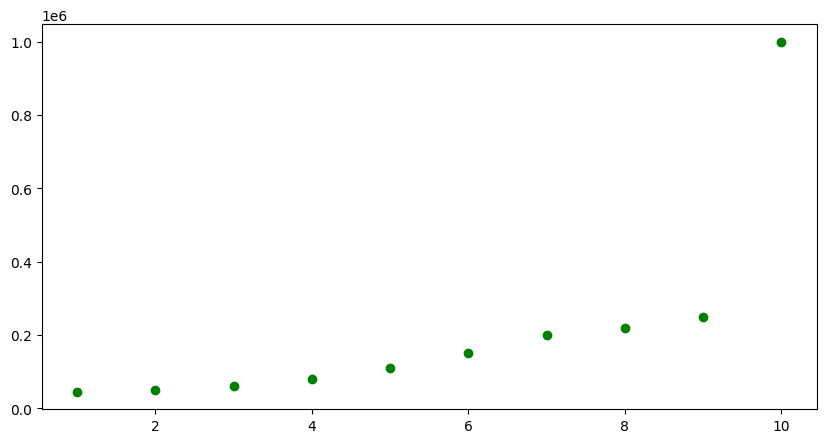

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(df.scale, df.Salary, color='green')

In [26]:
polyFeat = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
X = df.scale
y = df.Salary

In [29]:
X_poly = polyFeat.fit_transform(np.array(X).reshape(-1,1))

In [31]:
linearReg = LinearRegression()
linearReg.fit(X_poly, y)

LinearRegression()

In [32]:
predictions = linearReg.predict(X_poly)

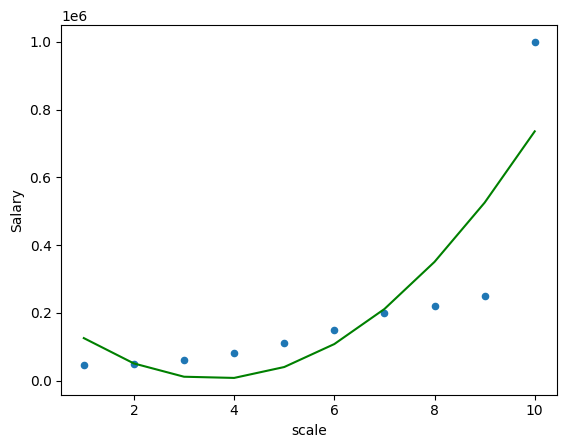

In [33]:
df.plot(kind='scatter', x='scale', y='Salary')
plt.plot(X, predictions, color='green')

In [34]:
print(f"R2 score: {r2_score(y, predictions)}")

R2 score: 0.7491335768382544


In [35]:
print(f"Coefficients: {linearReg.coef_}")
print(f"Intercept: {linearReg.intercept_}")

Coefficients: [-128401.51515152   17840.90909091]
Intercept: 235833.3333333329
